# Menambah Library

Memasukan library yang dibutuhkan dalam projek

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import winsound
import tf2onnx

from tensorflow.python.client import device_lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime
from onnx import save


# Cek Spek

Mengetahui apakah hanya dapat memakai CPU atau dapat menggunakan CPU dan GPU (Nvidia Cuda)

In [27]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2393269860598808948
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1473062299
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3398030505963599015
 physical_device_desc: "device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

# AUGMENTASI GAMBAR

Generator untuk membuat gambar menjadi lebih variatif dan menentukan besar data yang digunakan untuk validasi

In [28]:
datagen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    validation_split = 0.2
)

datagen_val = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

# DATASET

Ubah data menjadi dataset training & validation

In [29]:
dataset = 'C:/Users/LENOVO/Downloads/PKB/Cat & Not Cat'

jumlah_batch = 64
ukuran_gambar = (85, 85)

train = datagen_train.flow_from_directory(
    dataset,
    target_size=ukuran_gambar,
    batch_size=jumlah_batch,
    class_mode='binary',
    subset='training'
)

val = datagen_val.flow_from_directory(
    dataset,
    target_size=ukuran_gambar,
    batch_size=jumlah_batch,
    class_mode='binary',
    subset='validation'
)

Found 4535 images belonging to 2 classes.
Found 1133 images belonging to 2 classes.


# MODEL CNN

Membuat model dengan algoritma cnn untuk klasifikasi gambar multi kelas

In [30]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(ukuran_gambar[0], ukuran_gambar[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# LATIH

Model yang sudah dibuat dilatih memakai dataset training Dan validation

In [31]:
berhenti_berharap = EarlyStopping(monitor='val_loss', patience=3)
            
latih = model.fit(
    train,
    validation_data=val,
    epochs=100,
    callbacks=[berhenti_berharap]
)

winsound.Beep(1500,5000)

Epoch 1/100
71/71 [==============================] - 31s 387ms/step - loss: 0.5029 - accuracy: 0.7852 - val_loss: 0.6188 - val_accuracy: 0.6964
Epoch 2/100
71/71 [==============================] - 21s 292ms/step - loss: 0.3816 - accuracy: 0.8569 - val_loss: 0.5385 - val_accuracy: 0.7405
Epoch 3/100
71/71 [==============================] - 19s 264ms/step - loss: 0.3573 - accuracy: 0.8653 - val_loss: 0.6164 - val_accuracy: 0.7317
Epoch 4/100
71/71 [==============================] - 22s 306ms/step - loss: 0.3449 - accuracy: 0.8673 - val_loss: 0.5484 - val_accuracy: 0.7502
Epoch 5/100
71/71 [==============================] - 23s 322ms/step - loss: 0.3338 - accuracy: 0.8754 - val_loss: 0.5293 - val_accuracy: 0.7440
Epoch 6/100
71/71 [==============================] - 19s 264ms/step - loss: 0.3242 - accuracy: 0.8752 - val_loss: 0.5124 - val_accuracy: 0.7529
Epoch 7/100
71/71 [==============================] - 19s 262ms/step - loss: 0.3129 - accuracy: 0.8785 - val_loss: 0.5394 - val_accuracy:

Grafik riwayat pelatihan untuk melihat seberapa baik model dilatih

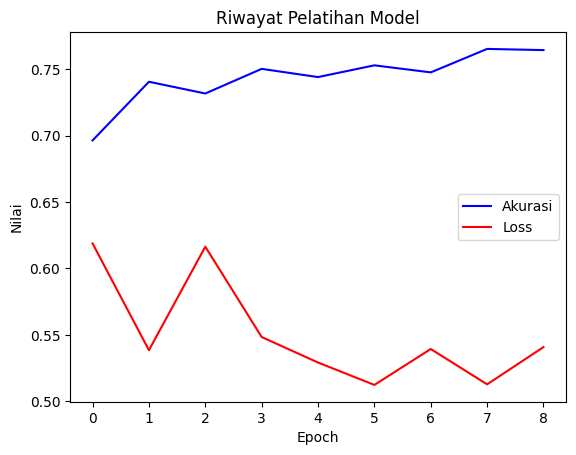

In [32]:
akurasi = latih.history['val_accuracy']
loss = latih.history['val_loss']

plt.plot(akurasi, color='blue', label='Akurasi')
plt.plot(loss, color='red', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Nilai')
plt.title('Riwayat Pelatihan Model')
plt.legend()
plt.show()

Cek akurasi akhir model

In [33]:
hasil = model.evaluate(val)

accuracy = hasil[1]
print(f'\nAkurasi Model: {accuracy * 100:.2f} %')

18/18 [==============================] - 3s 148ms/step - loss: 0.5409 - accuracy: 0.7643

Akurasi Model: 76.43 %


# Simpan Model

jika merasa model sudah cukup baik dapat disimpan untuk digunakan di mana saja

In [34]:
nama_model = 'Models/binary-' + datetime.now().strftime("%Y%m%d%H%M%S")

file h5/hdf5/keras untuk yang memakai tensorflow dan keras

In [35]:
model.save(nama_model + '.h5');

file onnx untuk yang memakai library onnx

In [36]:
input = [tf.TensorSpec([None, ukuran_gambar[0], ukuran_gambar[1], 3], tf.float32, name='input_gambar')]
onnx_model, _ = tf2onnx.convert.from_keras(model, input, opset=13)
save(onnx_model, "Models/21062024.onnx")